# Classificação de Estágios da Doença de Alzheimer

## SVM

### Bibliotecas

In [36]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import random
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, log_loss, cohen_kappa_score, hamming_loss, jaccard_score, matthews_corrcoef
import seaborn as sns
import matplotlib.pyplot as plt

### Variáveis iniciais

In [3]:
# Valor fixo de seed para reprodutibilidade
random_seed = 42

# Pasta do dataset
dataset_folder = "../data/Alzheimer_MRI_4_classes_dataset"
folders = ["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"]

# Número máximo de imagens a serem carregadas
max_images_per_class = 100

### Random Seed

In [4]:
random.seed(random_seed)
np.random.seed(random_seed)

### Carregar dados

In [5]:
# Função para carregar e pré-processar as imagens
def load_images(dataset_folder, folders, image_size=(128, 128), max_images_per_class=100):
    images = []
    labels = []
    for folder in folders:
        folder_path = os.path.join(dataset_folder, folder)
        if os.path.exists(folder_path):
            count = 0
            for img_name in os.listdir(folder_path):
                if count >= max_images_per_class:
                    break
                img_path = os.path.join(folder_path, img_name)
                image = Image.open(img_path).convert("RGB")
                image = image.resize(image_size)
                images.append(np.array(image).flatten())  # Flatten the image
                labels.append(folder)
                count += 1
    return np.array(images), np.array(labels)

In [6]:
# Carregar as imagens e os rótulos
X, y = load_images(dataset_folder, folders, max_images_per_class=max_images_per_class)

In [7]:
# Codificar os rótulos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

### Dividir em treino e teste

In [8]:
# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=random_seed)

In [9]:
# Tamanho do conjunto de treinamento
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Tamanho do conjunto de teste
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (291, 49152)
y_train shape: (291,)
X_test shape: (73, 49152)
y_test shape: (73,)


### Treinar o modelo

In [23]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

### Predizer utilizando o modelo treinado

In [24]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

### Métricas

In [31]:
# Acurácia

print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.6712328767123288


In [32]:
# Acurácia

print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.6712328767123288


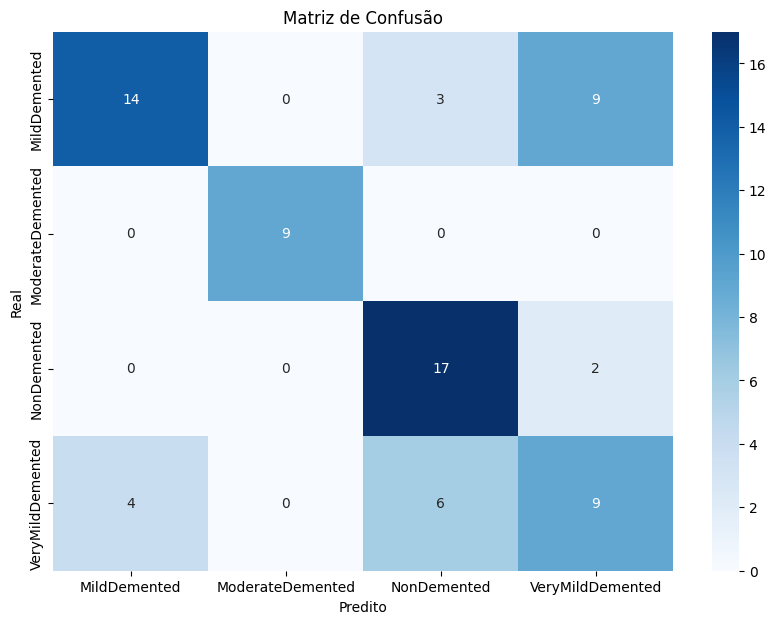

In [33]:
# Matriz de confusão
# É uma ferramenta visual que mostra o desempenho do modelo em cada classe

cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão usando Seaborn com a paleta Set2
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [37]:
# Área sobre a curva ou AUC para cada classe

y_test_binarized = label_binarize(y_test, classes=np.arange(len(folders)))
auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')
print("AUC:", auc)

AUC: 0.8959316366931148


In [38]:
# Log Loss (Logarithmic Loss)
# Mede a incerteza das previsões. Penaliza previsões incorretas com alta confiança mais severamente do que previsões incorretas com baixa confiança.

log_loss_value = log_loss(y_test, y_pred_proba)
print("Log Loss:", log_loss_value)

Log Loss: 0.930735574114718


In [39]:
# Cohen's Kappa
# Mede a concordância entre as previsões do modelo e os rótulos verdadeiros, ajustando para a concordância que ocorre por acaso.

kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.5514592933947773


In [40]:
# Hamming Loss
# Mede a fração de rótulos incorretamente previstos. É útil para problemas multilabel.

hamming = hamming_loss(y_test, y_pred)
print("Hamming Loss:", hamming)

Hamming Loss: 0.3287671232876712


In [41]:
# Jaccard Index
# Mede a similaridade entre os conjuntos de rótulos previstos e os rótulos verdadeiros.

jaccard = jaccard_score(y_test, y_pred, average='macro')
print("Jaccard Index:", jaccard)

Jaccard Index: 0.593452380952381


In [42]:
# Matthews Correlation Coefficient (MCC)
# Considera todos os elementos da matriz de confusão e é uma métrica equilibrada que pode ser usada mesmo se as classes tiverem tamanhos muito diferentes.

mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient:", mcc)

Matthews Correlation Coefficient: 0.5596258957385221
